# Clusterização com K-Means
Implemente o algoritmo K-Means no conjunto de dados Iris (removendo as labels). Avalie a qualidade da clusterização utilizando o coeficiente de Silhueta e a inércia dos clusters.

Autor: Jardson Alves Ribeiro

In [1]:
# Importado as bibliotecas necessárias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Importado o arquivo csv.
dataset = pd.read_csv("/content/iris.csv", encoding="utf-8")

In [3]:
# Exibindo as 10 primeiras linhas do dataset.
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Transformado a coluna species em dados categóricos.
valores_coluna = dataset['species'].value_counts()
print(valores_coluna)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [7]:
#Transformando valores da coluna species.
mapeamento = {'setosa': 1, 'versicolor': 2, 'virginica': 3}
dataset['species'] = dataset['species'].map(mapeamento)
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [8]:
# Selecionar apenas as colunas numéricas para a clusterização.
X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [9]:
# Selecionar apenas as colunas numéricas para a clusterização.
X = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [10]:
# Inicializar e treinar o modelo K-Means.
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [11]:
# Prever os clusters.
labels = kmeans.predict(X)

In [12]:
# Calcular a inércia dos clusters.
inertia = kmeans.inertia_
print(f'Inércia dos Clusters: {inertia:.2f}')

Inércia dos Clusters: 78.95


In [13]:
# Calcular o coeficiente de Silhueta.
silhouette_avg = silhouette_score(X, labels)
print(f'Coeficiente de Silhueta: {silhouette_avg:.2f}')

Coeficiente de Silhueta: 0.55


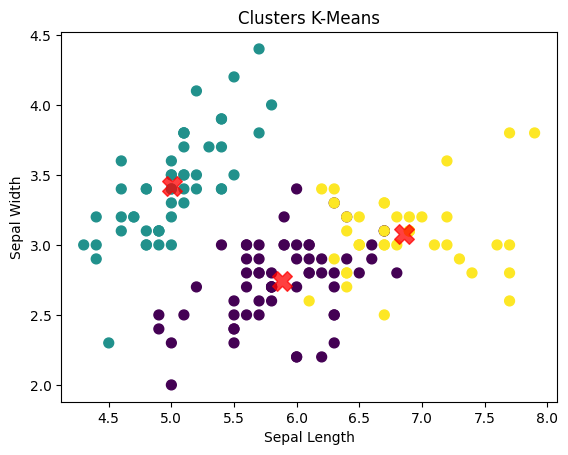

In [14]:
# Exibindo clusters K-Means.
plt.scatter(X['sepal_length'], X['sepal_width'], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters K-Means')
plt.show()